# Ward

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.append("../")

In [3]:
from spopt import WardSpatial
import geopandas as gpd
import libpysal
import numpy as np

##### Airbnb Spots Clustering in Chicago

Cluster 77 communities into 8 regions using Ward linkage with a spatial connectivity constraint.

<AxesSubplot:>

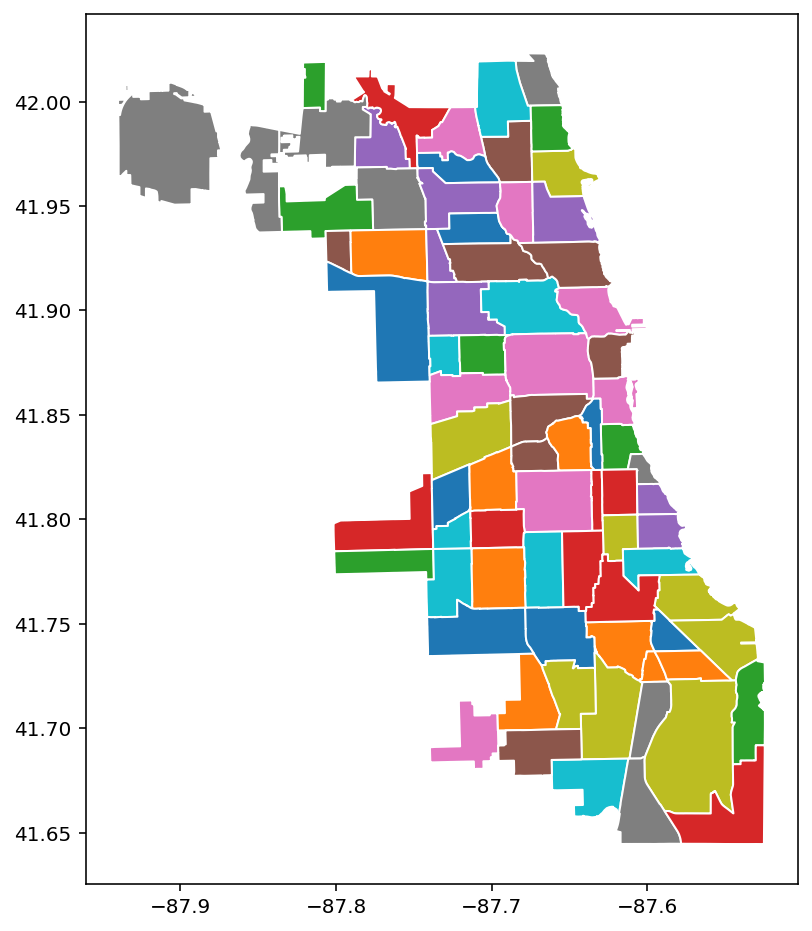

In [4]:
pth = libpysal.examples.get_path('airbnb_Chicago 2015.shp')
chicago = gpd.read_file(pth)
chicago.plot(column='community', categorical=True, figsize=(12,8), edgecolor='w')

In [5]:
attrs_name = ['num_spots']
w = libpysal.weights.Queen.from_dataframe(chicago)
n_clusters = 8

In [6]:
model = WardSpatial(chicago, w, attrs_name, n_clusters)
model.solve()
chicago['ward_new'] = model.labels_

<AxesSubplot:>

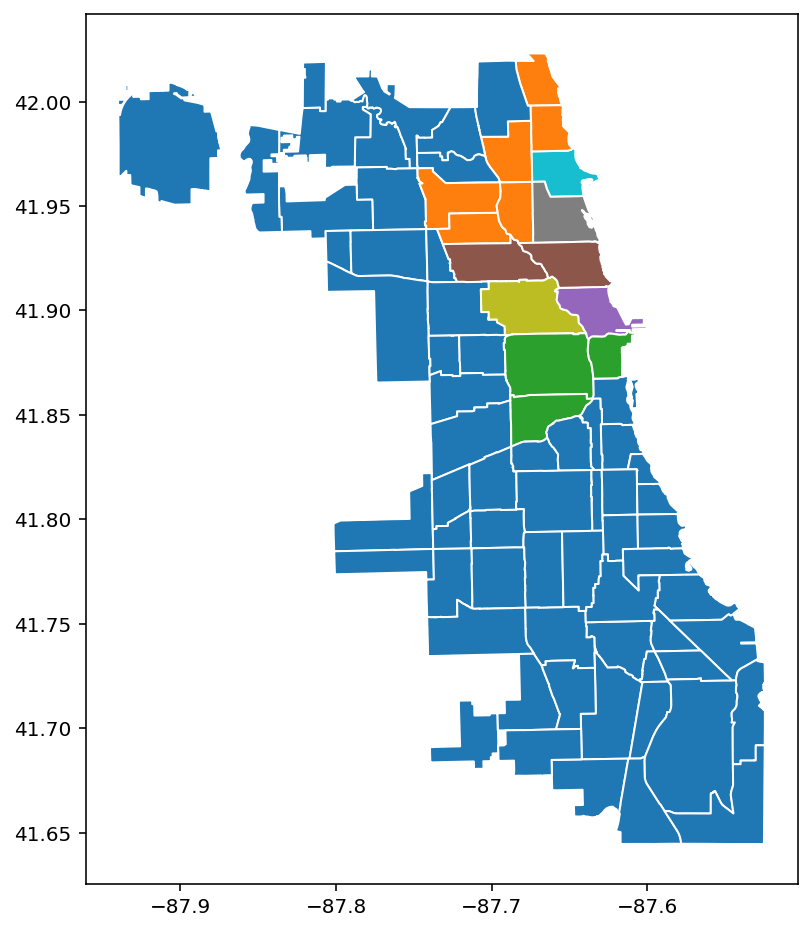

In [7]:
chicago.plot(column='ward_new', categorical=True, figsize=(12,8), edgecolor='w')